In [47]:
import matplotlib.pyplot as plt
#plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.patheffects as mpe
import matplotlib

In [48]:
df = pd.read_csv("BG_Traffic_root - Sheet1.csv")

In [49]:
df.shape[0]

2400

In [50]:
df.columns

Index(['Host', 'Port', 'Segment', 'RTT', 'TP', 'PK', 'interface', 'Algorithm',
       'Arrival', 'Delivery', 'Stall', 'Bitrate', 'P1203'],
      dtype='object')

In [51]:
df.dropna(inplace=True)

In [52]:
X = df[['RTT', 'TP', 'PK']]
y = df['P1203']

In [53]:
df.shape[0]

2394

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression

In [55]:
lm = LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression()

In [61]:
lm

LinearRegression()

In [57]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Density')

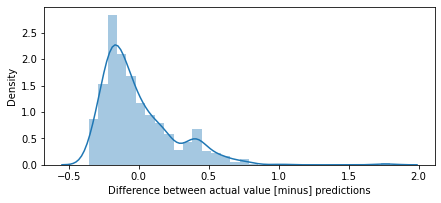

In [58]:
plt.figure(figsize=(7,3))
sns.distplot((y_test-predictions))
plt.gcf().subplots_adjust(bottom=0.15) 
plt.xlabel("Difference between actual value [minus] predictions")
plt.ylabel("Density")

In [59]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2002782230879534
MSE: 0.06805075978071089
RMSE: 0.26086540548856013


In [62]:
ap = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
ap

,Actual,Predicted
240,1.871,1.402212
1357,1.258,1.458448
1755,1.442,1.447119
801,1.261,1.428765
768,1.279,1.492836
...,...,...
1450,1.402,1.408779
2391,1.433,1.512576
2178,1.495,1.583362
569,1.394,1.506947


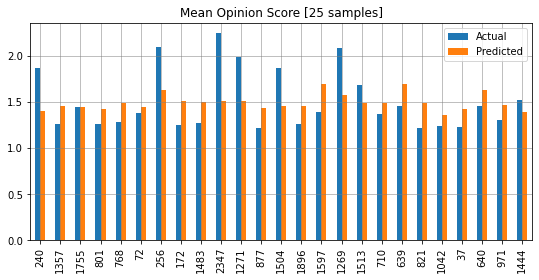

In [63]:
df1 = ap.head(25)
df1.plot(kind='bar',figsize=(9,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.title("Mean Opinion Score [25 samples]")
#plt.savefig('bbatp/25samples.png', dpi = 300)
plt.show()